# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [2]:
data = pd.read_csv('breast-cancer-wisconsin.data.txt',index_col='Sample code number',names=['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class'])
data.head(10)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Sample code number,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2
1017122,8,10,10,8,7,10,9,7,1,4
1018099,1,1,1,1,2,10,3,1,1,2
1018561,2,1,2,1,2,1,3,1,1,2
1033078,2,1,1,1,2,1,1,1,5,2


In [3]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 60.1+ KB


In [5]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Clump Thickness,699,NaN,NaN,NaN,4.41774,2.81574,1,2,4,6,10
Uniformity of Cell Size,699,NaN,NaN,NaN,3.13448,3.05146,1,1,1,5,10
Uniformity of Cell Shape,699,NaN,NaN,NaN,3.20744,2.97191,1,1,1,5,10
Marginal Adhesion,699,NaN,NaN,NaN,2.80687,2.85538,1,1,1,4,10
Single Epithelial Cell Size,699,NaN,NaN,NaN,3.21602,2.2143,1,2,2,4,10
Bare Nuclei,699,11,1,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bland Chromatin,699,NaN,NaN,NaN,3.43777,2.43836,1,2,3,5,10
Normal Nucleoli,699,NaN,NaN,NaN,2.86695,3.05363,1,1,1,4,10
Mitoses,699,NaN,NaN,NaN,1.58941,1.71508,1,1,1,1,10
Class,699,NaN,NaN,NaN,2.68956,0.951273,2,2,2,4,4


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [6]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [7]:
data.isna().any()

Clump Thickness                False
Uniformity of Cell Size        False
Uniformity of Cell Shape       False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Bland Chromatin                False
Normal Nucleoli                False
Mitoses                        False
Class                          False
dtype: bool

In [8]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [9]:
#Bare Nuclei is 'object' data type, so it might have unwanted charecters
data[~data['Bare Nuclei'].isin(['1','2','3','4','5','6','7','8','9','10'])]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Sample code number,,,,,,,,,,
1057013,8,4,5,1,2,?,7,3,1,4
1096800,6,6,6,9,6,?,7,8,1,2
1183246,1,1,1,1,1,?,2,1,1,2
1184840,1,1,3,1,2,?,2,1,1,2
1193683,1,1,2,1,3,?,1,1,1,2
1197510,5,1,1,1,2,?,3,1,1,2
1241232,3,1,4,1,2,?,3,1,1,2
169356,3,1,1,1,2,?,3,1,1,2
432809,3,1,3,1,2,?,2,1,1,2


In [10]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [11]:
data[data['Bare Nuclei'].isin(['1','2','3','4','5','6','7','8','9','10'])]['Bare Nuclei'].astype('int').mean()

3.5446559297218156

In [12]:
data[data['Bare Nuclei'].isin(['1','2','3','4','5','6','7','8','9','10'])]['Bare Nuclei'].astype('int').median()

1.0

In [13]:
data[data['Bare Nuclei'].isin(['1','2','3','4','5','6','7','8','9','10'])]['Bare Nuclei'].astype('int').mode()

0    1
dtype: int64

In [14]:
data['Bare Nuclei'] = data['Bare Nuclei'].map(lambda x : 3 if x == "?" else x)


In [15]:
data['Bare Nuclei']=data['Bare Nuclei'].astype('int64',inplace=True)
data.dtypes

Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


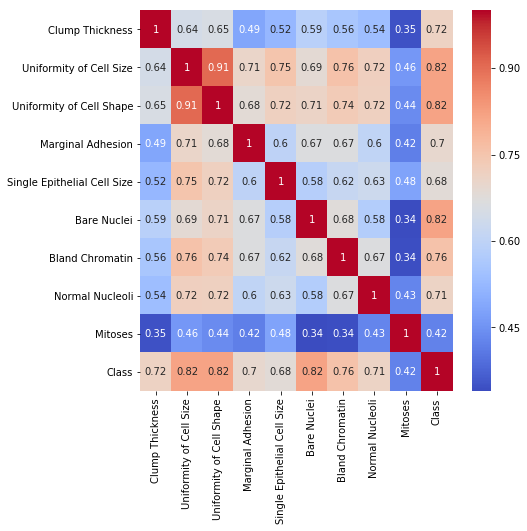

In [16]:
# Check for correlation of variable
f,ax = plt.subplots(figsize=(7,7))

sns.heatmap(data.corr(),annot=True,cmap = "coolwarm");


In [17]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

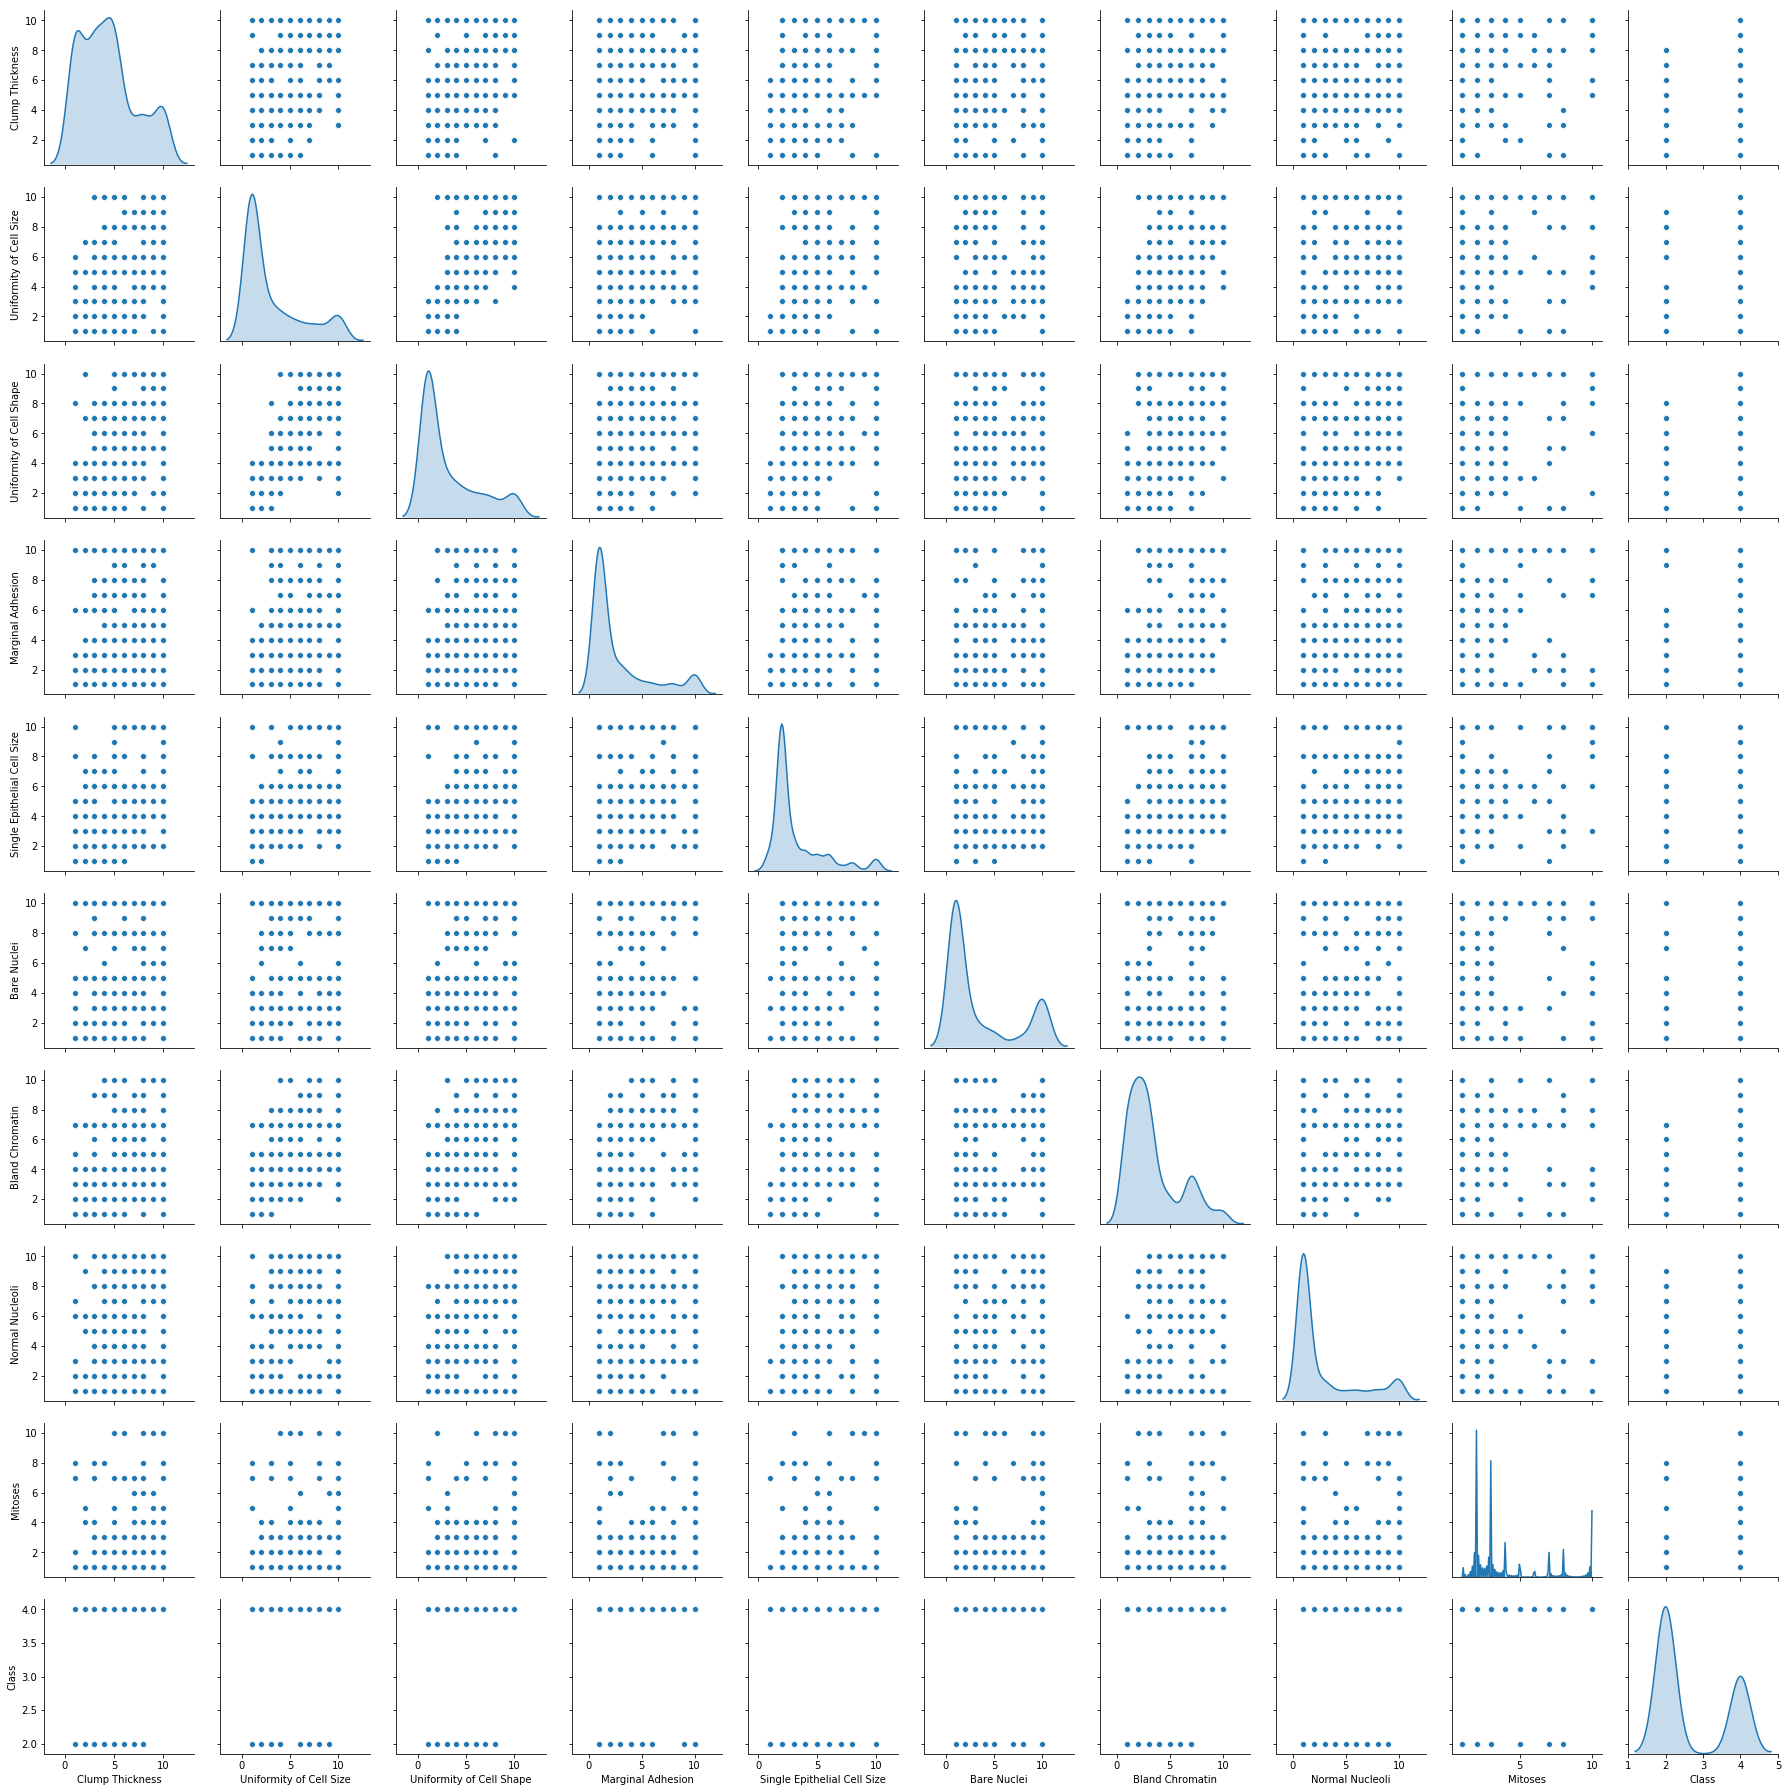

In [18]:
#Let us check for pair plots
sns.pairplot(data,diag_kind='kde');

In [19]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

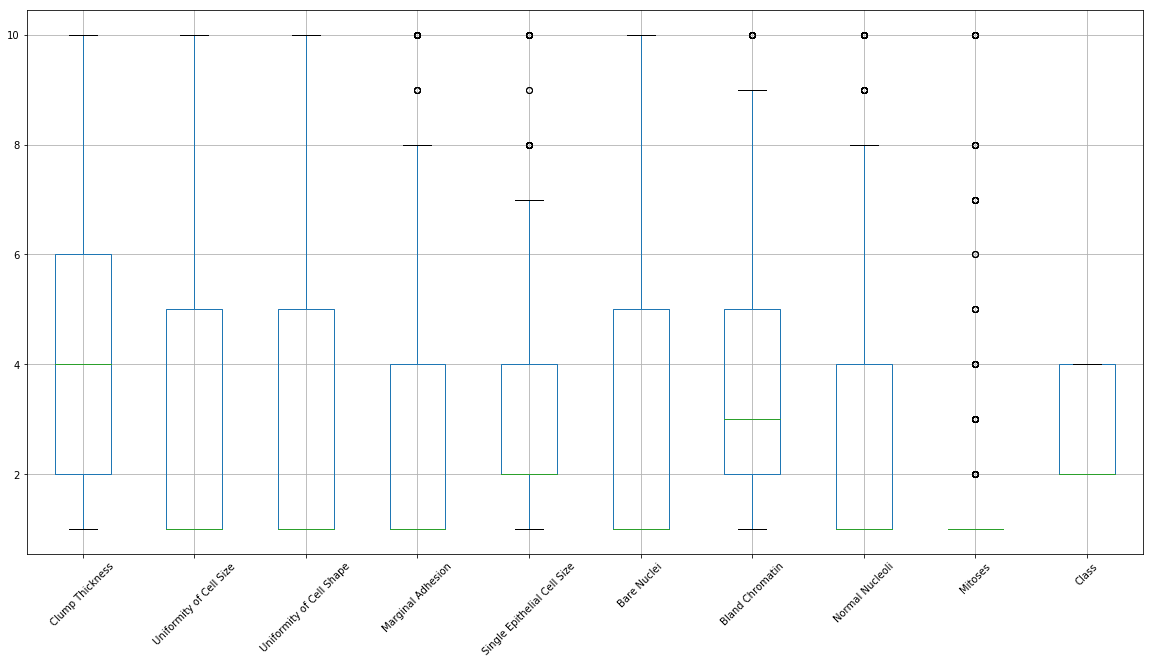

In [20]:
f,ax = plt.subplots(figsize=(20,10))
data.boxplot()
plt.xticks(rotation='45');


In [21]:
# outliers are present in marginal,epithelial,bland,normal columns

In [22]:
def IQR(column):
    q1 = data[column].quantile(.25)
    q3 = data[column].quantile(.75)
    IQR = q3-q1
    print("IQR : {}".format(IQR))
    upper = q3+(1.5*IQR)
    lower = q1-(1.5*IQR)
    print("upper cap : {}".format(upper))
    print("lower cap : {}".format(lower))

In [23]:
IQR('Marginal Adhesion')

IQR : 3.0
upper cap : 8.5
lower cap : -3.5


In [24]:
IQR('Single Epithelial Cell Size')

IQR : 2.0
upper cap : 7.0
lower cap : -1.0


In [25]:
IQR('Bland Chromatin')

IQR : 3.0
upper cap : 9.5
lower cap : -2.5


In [26]:
IQR('Normal Nucleoli')

IQR : 3.0
upper cap : 8.5
lower cap : -3.5


In [27]:
data['Marginal Adhesion'] = data['Marginal Adhesion'].apply(lambda x : 8 if x > 8 else x)

In [28]:
data['Single Epithelial Cell Size'] = data['Single Epithelial Cell Size'].apply(lambda x : 7 if x >7 else x)

In [29]:
data['Bland Chromatin'] = data['Bland Chromatin'].apply(lambda x : 9 if x >9 else x)

In [30]:
data['Normal Nucleoli'] = data['Normal Nucleoli'].apply(lambda x : 8 if x >8 else x)

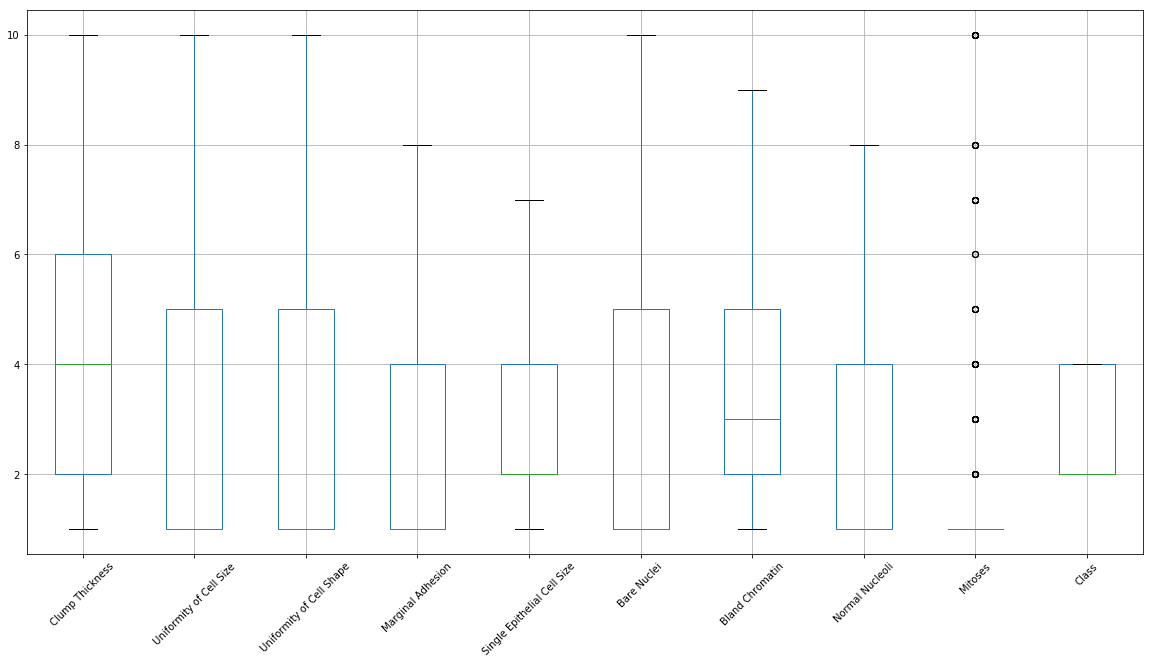

In [31]:
f,ax = plt.subplots(figsize=(20,10))
data.boxplot()
plt.xticks(rotation="45");

In [32]:
# We could see most of the outliers are now removed.

In [33]:
X = data.drop(columns='Class')
y = data['Class']

In [34]:
#standardizing
from scipy.stats import zscore
X.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
Sample code number,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1
1002945,5,4,4,5,7,10,3,2,1
1015425,3,1,1,1,2,2,3,1,1
1016277,6,8,8,1,3,4,3,7,1
1017023,4,1,1,3,2,1,3,1,1


In [35]:
X = X.apply(zscore)

In [36]:
X.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
Sample code number,,,,,,,,,
1000025,0.206936,-0.699995,-0.743299,-0.665850,-0.590091,-0.703348,-0.173064,-0.636797,-0.343912
1002945,0.206936,0.283845,0.266875,0.955855,2.227351,1.796516,-0.173064,-0.255374,-0.343912
1015425,-0.503866,-0.699995,-0.743299,-0.665850,-0.590091,-0.425585,-0.173064,-0.636797,-0.343912
1016277,0.562336,1.595632,1.613773,-0.665850,-0.026602,0.129940,-0.173064,1.651743,-0.343912
1017023,-0.148465,-0.699995,-0.743299,0.145002,-0.590091,-0.703348,-0.173064,-0.636797,-0.343912


# Q6 Create a covariance matrix for identifying Principal components

In [37]:
# PCA
# Step 1 - Create covariance matrix


In [38]:
A = X.corr()
A

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
Clump Thickness,1.000000,0.644913,0.654589,0.503473,0.549857,0.588433,0.564000,0.548729,0.350034
Uniformity of Cell Size,0.644913,1.000000,0.906882,0.723304,0.784532,0.687417,0.755594,0.727446,0.458693
Uniformity of Cell Shape,0.654589,0.906882,1.000000,0.697791,0.754932,0.709812,0.736112,0.722085,0.438911
Marginal Adhesion,0.503473,0.723304,0.697791,1.000000,0.660129,0.681642,0.684545,0.633463,0.403183
Single Epithelial Cell Size,0.549857,0.784532,0.754932,0.660129,1.000000,0.627506,0.656892,0.685648,0.457453
Bare Nuclei,0.588433,0.687417,0.709812,0.681642,0.627506,1.000000,0.684217,0.599588,0.339844
Bland Chromatin,0.564000,0.755594,0.736112,0.684545,0.656892,0.684217,1.000000,0.675920,0.342281
Normal Nucleoli,0.548729,0.727446,0.722085,0.633463,0.685648,0.599588,0.675920,1.000000,0.424142
Mitoses,0.350034,0.458693,0.438911,0.403183,0.457453,0.339844,0.342281,0.424142,1.000000


# Q7 Identify eigen values and eigen vector

In [39]:
# Step 2- Get eigen values and eigen vector

In [40]:
from scipy import linalg as LA
eigvals,eigvecs = LA.eig(A)
pd.DataFrame(np.diag(eigvals))


,0,1,2,3,4,5,6,7,8
0,(5.995275909111191+0j),0j,0j,0j,0j,0j,0j,0j,0j
1,0j,(0.7688484306429929+0j),0j,0j,0j,0j,0j,0j,0j
2,0j,0j,(0.533242642432938+0j),0j,0j,0j,0j,0j,0j
3,0j,0j,0j,(0.08828174623739878+0j),0j,0j,0j,0j,0j
4,0j,0j,0j,0j,(0.43272321458939667+0j),0j,0j,0j,0j
5,0j,0j,0j,0j,0j,(0.2494709127655802+0j),0j,0j,0j
6,0j,0j,0j,0j,0j,0j,(0.33926374484345045+0j),0j,0j
7,0j,0j,0j,0j,0j,0j,0j,(0.2940871407316456+0j),0j
8,0j,0j,0j,0j,0j,0j,0j,0j,(0.2988062586454129+0j)


In [41]:
pd.DataFrame(eigvecs)

,0,1,2,3,4,5,6,7,8
0,-0.300735,0.094468,-0.884471,-0.001201,-0.029623,0.178466,0.066234,-0.259933,0.116891
1,-0.377572,0.032674,0.022237,-0.738063,0.215973,-0.354200,-0.278239,-0.069419,-0.238334
2,-0.373941,0.063143,-0.037767,0.659971,0.186608,-0.518572,-0.260428,0.040979,-0.214363
3,-0.336575,0.071153,0.371950,0.055175,-0.422524,-0.011612,-0.038584,-0.690989,0.287484
4,-0.347289,-0.068786,0.165136,0.075722,0.330214,0.608828,-0.511229,0.181594,0.260021
5,-0.332966,0.225941,-0.018942,-0.083332,-0.607465,-0.099901,0.004534,0.634152,0.222750
6,-0.344543,0.217355,0.161396,0.058138,-0.063912,0.418854,0.367879,0.002064,-0.699826
7,-0.337906,-0.017981,0.147512,-0.021813,0.461666,-0.132473,0.666698,0.098795,0.422290
8,-0.222523,-0.936809,-0.044789,0.011061,-0.209414,0.000734,0.087679,0.059842,-0.124984


# Q8 Find variance and cumulative variance by each eigen vector

In [42]:
variance = sum(eigvals)
variance

(9.000000000000007+0j)

In [43]:
cum_variance = np.cumsum(eigvals/variance)
cum_variance

array([0.66614177+0.j, 0.75156937+0.j, 0.81081855+0.j, 0.82062764+0.j,
       0.86870799+0.j, 0.89642698+0.j, 0.93412296+0.j, 0.9667993 +0.j,
       1.        +0.j])

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [44]:
from sklearn.decomposition import PCA

In [45]:
pca = PCA(random_state=4)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=4,
    svd_solver='auto', tol=0.0, whiten=False)

In [46]:
X_pca = pca.transform(X)
X_pca

array([[-1.49458166e+00, -8.00541314e-02, -6.08770425e-01, ...,
        -2.12596439e-01, -4.00674106e-01, -3.05158375e-03],
       [ 1.74018387e+00, -6.55538584e-01,  4.52319751e-01, ...,
         7.74528244e-01, -9.24588915e-01, -2.97822749e-02],
       [-1.61585882e+00, -7.56639026e-02,  1.46514978e-02, ...,
         1.48307819e-01, -2.46071278e-01,  1.92407956e-02],
       ...,
       [ 3.95012273e+00, -2.22322064e-01,  8.07793276e-01, ...,
         3.13386400e-01,  3.33137724e-02, -1.07654650e-01],
       [ 2.29622734e+00, -9.81178346e-01,  9.13618740e-01, ...,
        -2.26609668e-01,  2.92890663e-01,  4.33414440e-01],
       [ 2.71492271e+00, -1.09026406e+00,  1.01424419e+00, ...,
        -2.76053375e-01,  2.30455047e-01, -6.95739522e-02]])

In [47]:
pd.DataFrame(pca.components_)

,0,1,2,3,4,5,6,7,8
0,0.300735,0.377572,0.373941,0.336575,0.347289,0.332966,0.344543,0.337906,0.222523
1,-0.094468,-0.032674,-0.063143,-0.071153,0.068786,-0.225941,-0.217355,0.017981,0.936809
2,-0.884471,0.022237,-0.037767,0.371950,0.165136,-0.018942,0.161396,0.147512,-0.044789
3,-0.029623,0.215973,0.186608,-0.422524,0.330214,-0.607465,-0.063912,0.461666,-0.209414
4,-0.066234,0.278239,0.260428,0.038584,0.511229,-0.004534,-0.367879,-0.666698,-0.087679
5,-0.116891,0.238334,0.214363,-0.287484,-0.260021,-0.222750,0.699826,-0.422290,0.124984
6,-0.259933,-0.069419,0.040979,-0.690989,0.181594,0.634152,0.002064,0.098795,0.059842
7,-0.178466,0.354200,0.518572,0.011612,-0.608828,0.099901,-0.418854,0.132473,-0.000734
8,0.001201,0.738063,-0.659971,-0.055175,-0.075722,0.083332,-0.058138,0.021813,-0.011061


In [48]:
pca.explained_variance_

array([6.00386513, 0.76994993, 0.5340066 , 0.43334316, 0.3397498 ,
       0.29923435, 0.29450847, 0.24982832, 0.08840822])

In [49]:
pca.explained_variance_ratio_

array([0.66614177, 0.0854276 , 0.05924918, 0.04808036, 0.03769597,
       0.0332007 , 0.03267635, 0.02771899, 0.00980908])

In [50]:
np.cumsum(pca.explained_variance_ratio_)

array([0.66614177, 0.75156937, 0.81081855, 0.85889891, 0.89659488,
       0.92979558, 0.96247193, 0.99019092, 1.        ])

In [51]:
# first 7 components constitute to >95% of variance

# Q10 Find correlation between components and features

In [52]:
Principal_components = pd.DataFrame(pca.components_)[:7]
Principal_components.columns = X.columns

In [53]:
Principal_components

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.300735,0.377572,0.373941,0.336575,0.347289,0.332966,0.344543,0.337906,0.222523
1,-0.094468,-0.032674,-0.063143,-0.071153,0.068786,-0.225941,-0.217355,0.017981,0.936809
2,-0.884471,0.022237,-0.037767,0.371950,0.165136,-0.018942,0.161396,0.147512,-0.044789
3,-0.029623,0.215973,0.186608,-0.422524,0.330214,-0.607465,-0.063912,0.461666,-0.209414
4,-0.066234,0.278239,0.260428,0.038584,0.511229,-0.004534,-0.367879,-0.666698,-0.087679
5,-0.116891,0.238334,0.214363,-0.287484,-0.260021,-0.222750,0.699826,-0.422290,0.124984
6,-0.259933,-0.069419,0.040979,-0.690989,0.181594,0.634152,0.002064,0.098795,0.059842


# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [54]:
jokes = pd.read_csv('jokes.csv')
jokes.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [55]:
ratings = jokes.iloc[:200,1:]

In [56]:
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q13 Change the column indices from 0 to 99

In [57]:
ratings.columns = range(100)
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [58]:
ratings.replace(99,0,inplace=True)

# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
ss = StandardScaler()

In [61]:
ratings_diff = pd.DataFrame(ss.fit_transform(ratings),columns=ratings.columns)
ratings_diff.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.857016,1.671649,-2.219181,-1.935298,-1.380394,-2.240830,-1.785253,0.877475,-2.233712,-1.132409,...,0.772232,-0.055329,-0.362193,-0.184043,-0.175922,-0.140401,-1.973424,-0.026858,-0.041444,-0.160954
1,0.789494,-0.180277,1.372710,1.315712,-0.432101,-2.505530,-0.160595,-1.083559,2.200591,1.667223,...,0.772232,-1.619456,-0.453066,2.083674,-0.233389,-0.859977,0.712411,0.070600,-1.367650,0.167461
2,-0.117881,-0.121130,-0.053284,0.181880,1.672963,1.814094,1.578074,1.929134,-0.004146,-0.179172,...,-0.192459,-0.055329,-0.362193,2.435660,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
3,-0.117881,1.581908,-0.053284,0.181880,0.339079,1.560803,-0.532913,1.298139,-0.004146,0.189306,...,-0.192459,-0.055329,-0.362193,-0.031131,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
4,1.772484,0.819110,-0.988252,-1.216599,0.257903,0.063882,1.223570,0.968206,-0.113390,0.968316,...,1.582983,1.707868,0.975838,1.313343,1.557140,0.380786,0.727864,1.850639,0.511142,0.330133


### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke

In [62]:
ratings_diff.mean()

0    -1.110223e-17
1    -9.658940e-17
2    -4.107825e-17
3     3.719247e-17
4    -8.881784e-18
5    -2.636780e-18
6    -1.665335e-18
7     2.331468e-17
8    -4.329870e-17
9    -2.553513e-17
10   -4.551914e-17
11   -8.604228e-17
12    6.661338e-17
13    5.467848e-17
14   -2.164935e-17
15   -1.065814e-16
16    1.637579e-17
17    2.331468e-17
18   -9.159340e-18
19    2.997602e-17
20    1.065814e-16
21    1.720846e-17
22   -2.775558e-17
23    4.329870e-17
24   -3.885781e-17
25   -1.498801e-17
26   -3.996803e-17
27   -9.436896e-18
28   -5.273559e-17
29    1.998401e-17
          ...     
70    7.632783e-19
71   -9.325873e-17
72   -4.024558e-17
73    7.743806e-17
74    1.290634e-17
75    3.885781e-17
76    3.747003e-18
77   -2.886580e-17
78   -9.853229e-18
79   -6.938894e-17
80    3.941292e-17
81    1.243450e-16
82    0.000000e+00
83    2.498002e-17
84   -2.045586e-16
85   -1.290634e-17
86   -8.465451e-17
87    5.107026e-17
88    2.997602e-17
89   -6.369905e-17
90   -4.385381e-17
91   -3.4972

In [63]:

ratings_diff['mean']=ratings_diff.mean()

In [64]:
ratings_diff.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,mean
0,-1.857016,1.671649,-2.219181,-1.935298,-1.380394,-2.240830,-1.785253,0.877475,-2.233712,-1.132409,...,-0.055329,-0.362193,-0.184043,-0.175922,-0.140401,-1.973424,-0.026858,-0.041444,-0.160954,-1.110223e-17
1,0.789494,-0.180277,1.372710,1.315712,-0.432101,-2.505530,-0.160595,-1.083559,2.200591,1.667223,...,-1.619456,-0.453066,2.083674,-0.233389,-0.859977,0.712411,0.070600,-1.367650,0.167461,-9.658940e-17
2,-0.117881,-0.121130,-0.053284,0.181880,1.672963,1.814094,1.578074,1.929134,-0.004146,-0.179172,...,-0.055329,-0.362193,2.435660,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954,-4.107825e-17
3,-0.117881,1.581908,-0.053284,0.181880,0.339079,1.560803,-0.532913,1.298139,-0.004146,0.189306,...,-0.055329,-0.362193,-0.031131,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954,3.719247e-17
4,1.772484,0.819110,-0.988252,-1.216599,0.257903,0.063882,1.223570,0.968206,-0.113390,0.968316,...,1.707868,0.975838,1.313343,1.557140,0.380786,0.727864,1.850639,0.511142,0.330133,-8.881784e-18


# Q17 Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [65]:
ratings_diff.sort_values(by=['mean'],ascending=False).head(10)['mean']

98    1.840889e-16
81    1.243450e-16
97    1.198694e-16
20    1.065814e-16
94    1.054712e-16
92    8.770762e-17
47    7.771561e-17
73    7.743806e-17
99    7.549517e-17
49    7.494005e-17
Name: mean, dtype: float64